<a href="https://colab.research.google.com/github/jakaylal/SSE_Project_Code/blob/main/V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms # Import transforms
import torchvision.datasets as datasets # Import datasets
import torchvision.models as models # Import models
import numpy as np
import os

def UpdateTransform():
    return transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    # Added a random vertical flip to the dataset
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

transform = UpdateTransform()
fixed_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

# Load dataset folders
train_dataset = datasets.ImageFolder(root="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train", transform=transform)
val_dataset = datasets.ImageFolder(root="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val", transform=fixed_transform)
test_dataset = datasets.ImageFolder(root="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test", transform=fixed_transform)

# Create loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#Load neural network
#model = models.resnet18(pretrained=True)
#model = models.resnet50(pretrained=True) #2nd Model
model = models.densenet121(pretrained=True) #3rd Model
#Next is DenseNet-121
#model.fc = nn.Linear(model.fc.in_features, 2)

#Moves workload to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(device)

#Accuracy criteria
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

def TrainModel():
  #Trains on entire dataset for x different iterations
  num_epochs = 25
  #Training loop
  for epoch in range(num_epochs):
      #Sets model to train, running_loss keeps track of accuracy
      model.train()
      running_loss = 0.0
      iteration_count = 0

      if (epoch + 1) % 10 == 0:
            transform = UpdateTransform()
            train_dataset.transform = transform

      for images, labels in train_loader:
          images = images.to(device)
          labels = labels.to(device)

          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          iteration_count += 1
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
      ValidateModel(val_loader)

def ValidateModel(loader_set):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in loader_set:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Validation Accuracy: {100 * correct / total:.2f}%')


if __name__ == "__main__":
  ValidateModel(test_loader)
  TrainModel()
  ValidateModel(test_loader)
  #torch.save(model.state_dict(), "ResNet18model_prototype.pth")
  #torch.save(model.state_dict(), "ResNet50model_prototype.pth")
  torch.save(model.state_dict(), "DenseNet121model_prototype.pth")
  print("Model saved")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 199MB/s]


cuda
Validation Accuracy: 0.00%
Epoch [1/25], Loss: 0.9551
Validation Accuracy: 100.00%
Epoch [2/25], Loss: 0.1052
Validation Accuracy: 75.00%
Epoch [3/25], Loss: 0.0706
Validation Accuracy: 100.00%
Epoch [4/25], Loss: 0.0710
Validation Accuracy: 100.00%
Epoch [5/25], Loss: 0.0519
Validation Accuracy: 87.50%
Epoch [6/25], Loss: 0.0342
Validation Accuracy: 93.75%
Epoch [7/25], Loss: 0.0292
Validation Accuracy: 100.00%
Epoch [8/25], Loss: 0.0252
Validation Accuracy: 100.00%
Epoch [9/25], Loss: 0.0215
Validation Accuracy: 100.00%
Epoch [10/25], Loss: 0.0249
Validation Accuracy: 100.00%
Epoch [11/25], Loss: 0.0250
Validation Accuracy: 100.00%
Epoch [12/25], Loss: 0.0292
Validation Accuracy: 93.75%
Epoch [13/25], Loss: 0.0314
Validation Accuracy: 100.00%
Epoch [14/25], Loss: 0.0203
Validation Accuracy: 100.00%
Epoch [15/25], Loss: 0.0146
Validation Accuracy: 87.50%
Epoch [16/25], Loss: 0.0109
Validation Accuracy: 100.00%
Epoch [17/25], Loss: 0.0145
Validation Accuracy: 93.75%
Epoch [18/25],

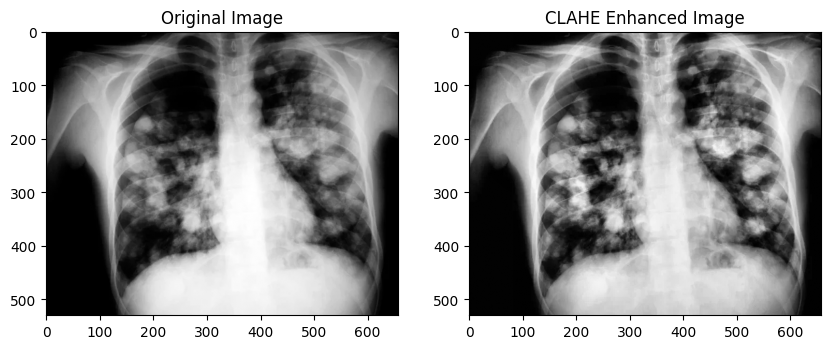

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in grayscale
img = cv2.imread('/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung 3.webp', cv2.IMREAD_GRAYSCALE)

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the image
cl1 = clahe.apply(img)

# Display original and enhanced images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('CLAHE Enhanced Image')
plt.imshow(cl1, cmap='gray')
plt.show()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NORMAL: 0.00%
PNEUMONIA: 100.00%
Predicted: PNEUMONIA with confidence 100.00%


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


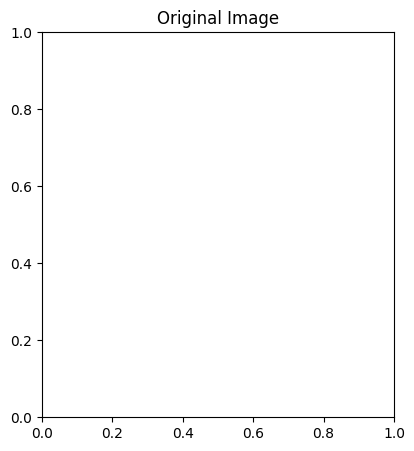

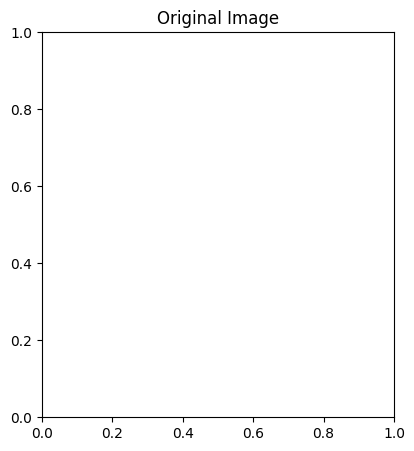

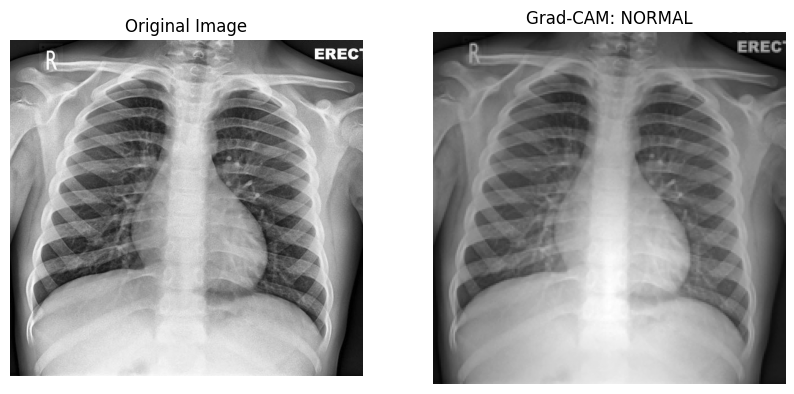

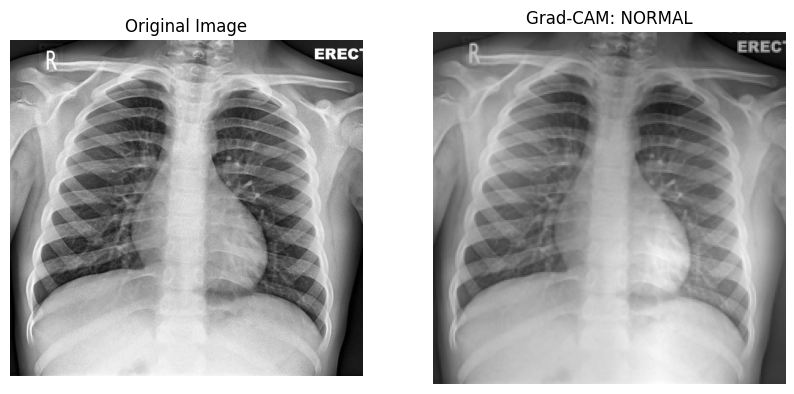

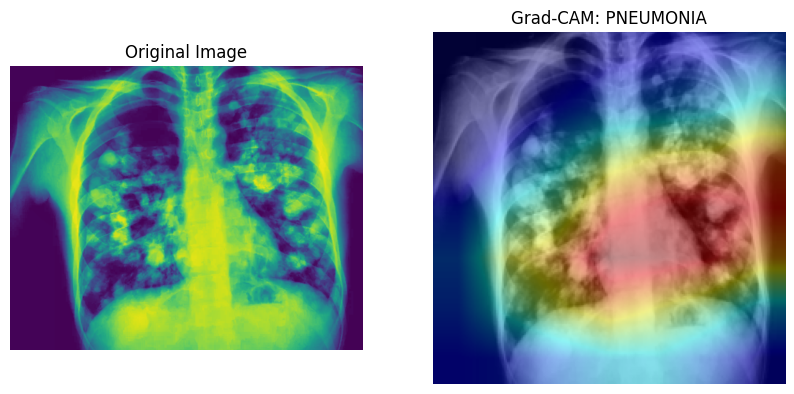

NORMAL: 0.00%
PNEUMONIA: 100.00%
Predicted: PNEUMONIA with confidence 100.00%


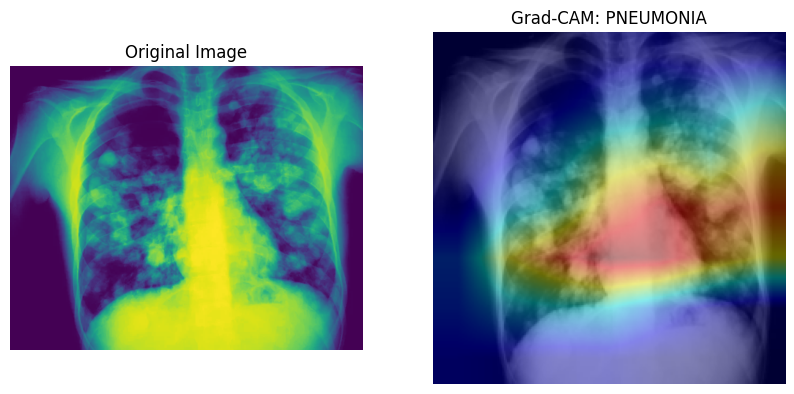

NORMAL: 0.00%
PNEUMONIA: 100.00%
Predicted: PNEUMONIA with confidence 100.00%


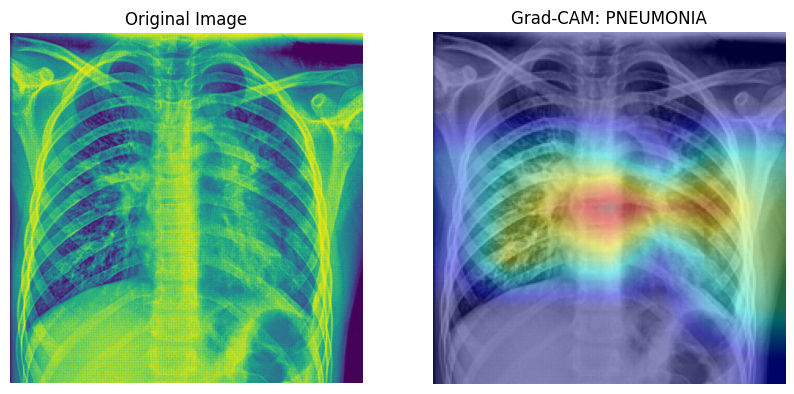

NORMAL: 0.00%
PNEUMONIA: 100.00%
Predicted: PNEUMONIA with confidence 100.00%


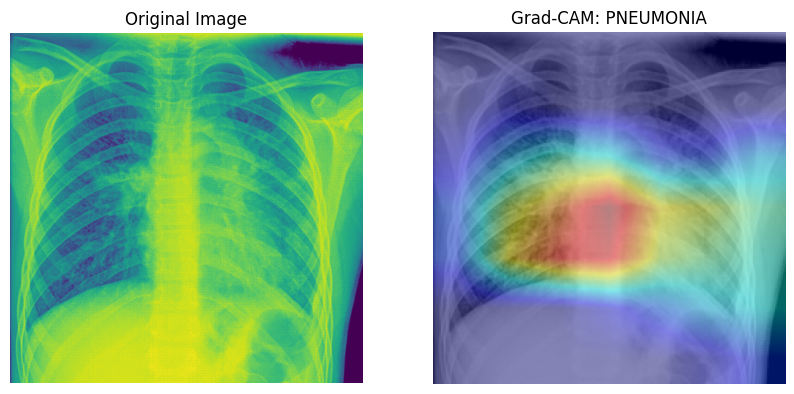

NORMAL: 0.00%
PNEUMONIA: 100.00%
Predicted: PNEUMONIA with confidence 100.00%


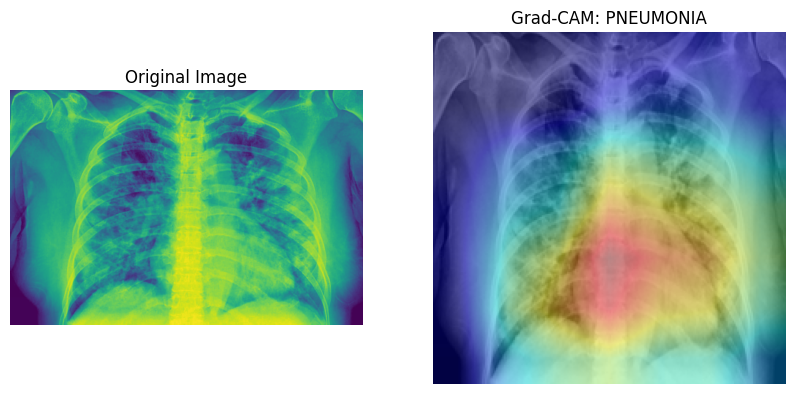

NORMAL: 0.00%
PNEUMONIA: 100.00%
Predicted: PNEUMONIA with confidence 100.00%


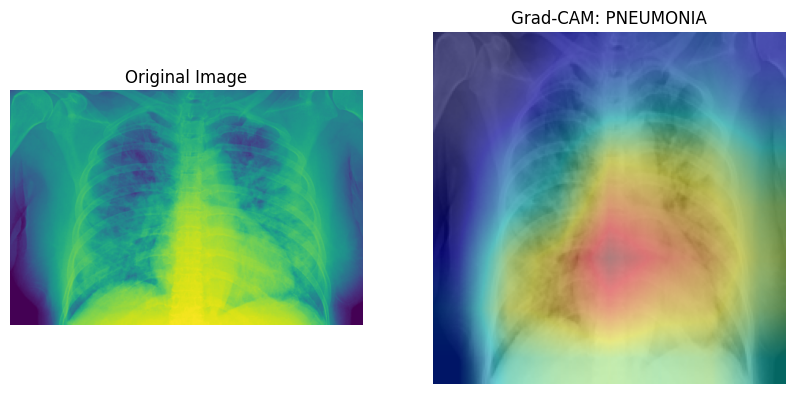

NORMAL: 11.51%
PNEUMONIA: 88.49%
Predicted: PNEUMONIA with confidence 88.49%


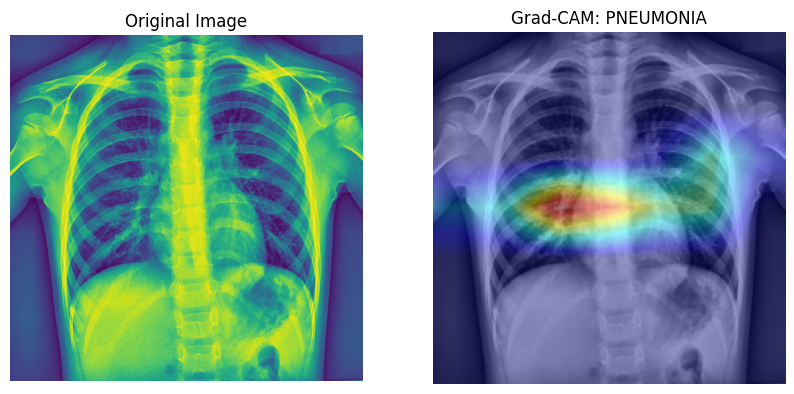

NORMAL: 89.90%
PNEUMONIA: 10.10%
Predicted: NORMAL with confidence 89.90%


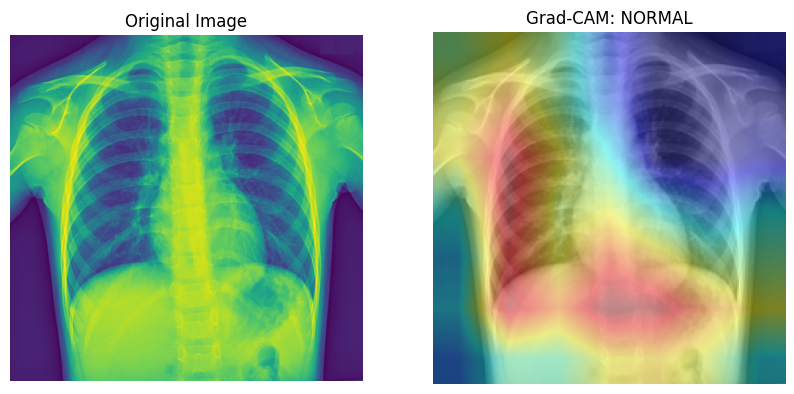

NORMAL: 91.45%
PNEUMONIA: 8.55%
Predicted: NORMAL with confidence 91.45%


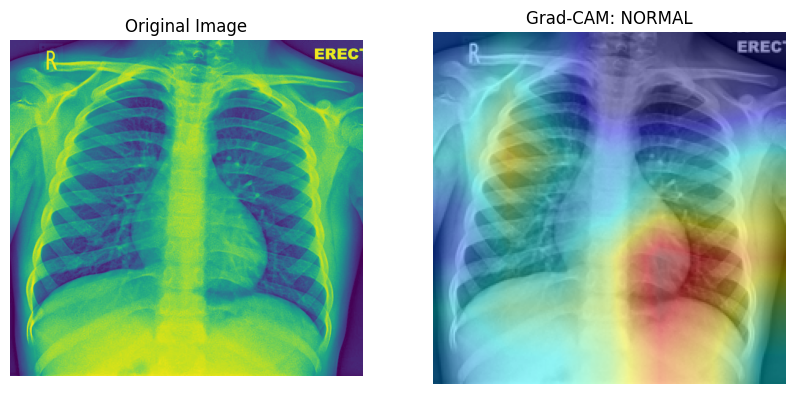

NORMAL: 99.23%
PNEUMONIA: 0.77%
Predicted: NORMAL with confidence 99.23%


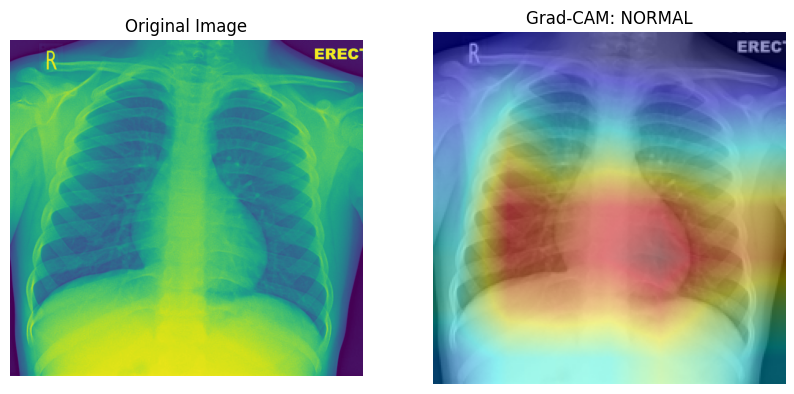

NORMAL: 8.28%
PNEUMONIA: 91.72%
Predicted: PNEUMONIA with confidence 91.72%


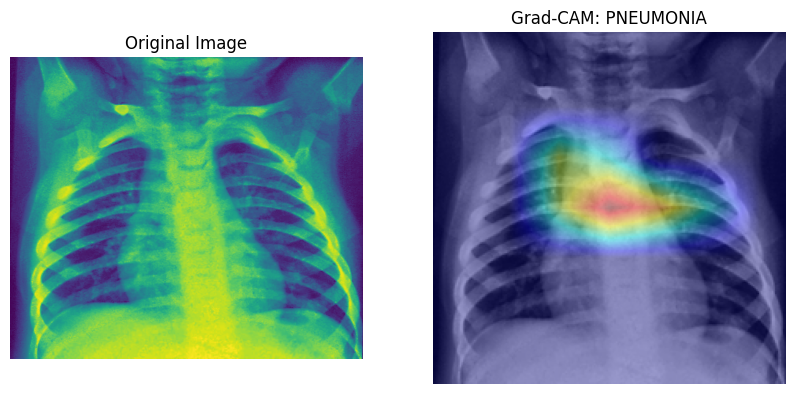

NORMAL: 32.83%
PNEUMONIA: 67.17%
Predicted: PNEUMONIA with confidence 67.17%


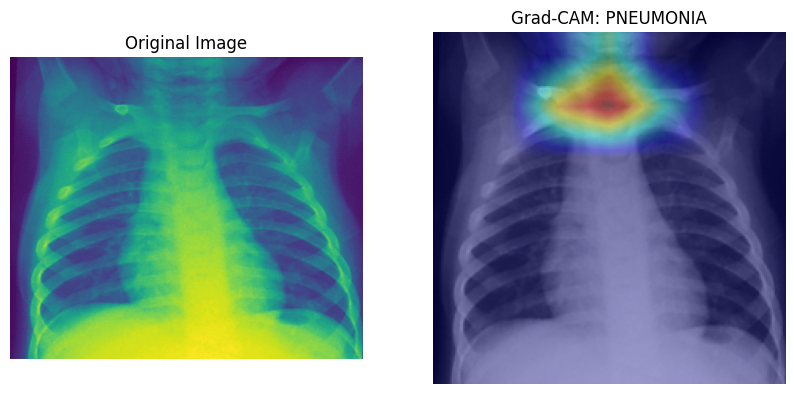

NORMAL: 0.47%
PNEUMONIA: 99.53%
Predicted: PNEUMONIA with confidence 99.53%


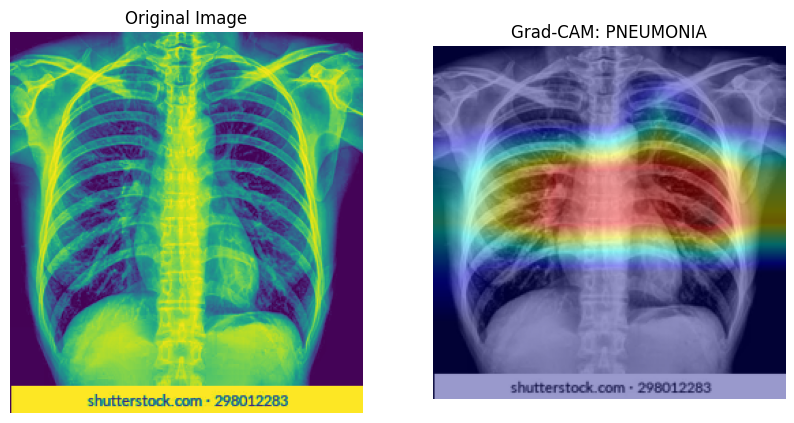

NORMAL: 3.06%
PNEUMONIA: 96.94%
Predicted: PNEUMONIA with confidence 96.94%


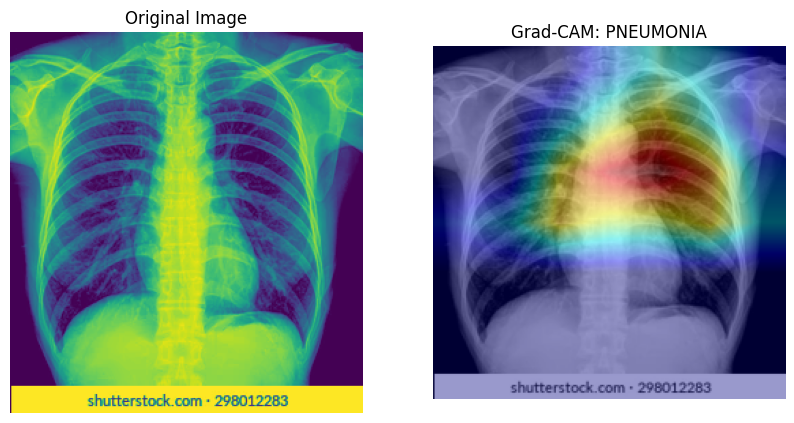

In [ ]:
from PIL import Image, ImageEnhance
import torch
import torchvision.models as models # Import models
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import os
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms # Import transforms
import torchvision.datasets as datasets # Import datasets
import torchvision.models as models # Import models
import numpy as np

# Load the model
model = models.resnet50(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.fc = nn.Linear(model.fc.in_features, 2)
#model.load_state_dict(torch.load("/content/drive/MyDrive/ResNet18model_prototype.pth", map_location=device))
model.load_state_dict(torch.load("/content/drive/MyDrive/ResNet18 Model and Testing Images/ResNet50model_prototype.pth", map_location=device))
model.to(device)
model.eval()

class_names = ["NORMAL", "PNEUMONIA"]

def DCE(pil_image):
    # Convert PIL image to grayscale NumPy array
    gray = np.array(pil_image.convert("L"))

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl1 = clahe.apply(gray)

    # Convert back to PIL RGB for the model
    cl1_rgb = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(cl1_rgb)

def generate_heatmap(model, input_tensor, target_class):
  #Generate Grad-cam heatmap for the given model and image tensor
  #Hook the activations and gradients from the last convolutional layer
  gradients = []
  activations = []

  def backward_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0].detach())

  def forward_hook(module, input, output):
    activations.append(output.detach())

  #Register hooks on the last conv layer
  target_layer = model.layer4[-1].conv2
  forward_handle = target_layer.register_forward_hook(forward_hook)
  backward_handle = target_layer.register_backward_hook(backward_hook)

  #forward pass
  output = model(input_tensor)
  model.zero_grad()
  class_score = output[0, target_class]
  class_score.backward()

  #Get hooked data
  grads = gradients[0]
  acts = activations[0]

  #Global average pooling
  weights = grads.mean(dim=(2,3), keepdim=True)
  cam = (weights * acts).sum(dim=1, keepdim=True)
  cam = F.relu(cam)

  #Normalize the heatmap
  cam = cam.squeeze().cpu().numpy()
  cam = cv2.resize(cam, (224, 224))
  cam = cam - np.min(cam)
  cam = cam / np.max(cam)

  #Clean up hooks
  forward_handle.remove()
  backward_handle.remove()

  return cam

def overlay_heatmap(img, heatmap):
  #Overlay heatmap on the original image
  heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
  img = np.array(img)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  overlay = cv2. addWeighted(heatmap, 0.4, img, 0.6, 0)
  return cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)


def IdentifyImage(img_path, dynamicEnhance):

# Same img transform
  fixed_transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.Grayscale(num_output_channels=3),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
  ])

  # Load and preprocess outside image
  image = Image.open(img_path).convert("L")

  if dynamicEnhance:
    image = DCE(image)
    image = image.convert("L")
  input_tensor = fixed_transform(image).unsqueeze(0).to(device)

  # Get prediction
  output = model(input_tensor)
  probabilities = F.softmax(output, dim=1)[0]
  _, predicted = torch.max(probabilities, 0)

  # Print results
  for i, prob in enumerate(probabilities):
      print(f"{class_names[i]}: {prob.item() * 100:.2f}%")

  print(f"Predicted: {class_names[predicted.item()]} with confidence {probabilities[predicted].item() * 100:.2f}%")

  #Generate and display Grad-cam heatmap
  heatmap = generate_heatmap(model, input_tensor, predicted.item())
  overlay = overlay_heatmap(image.resize((224, 224)), heatmap)

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.title(f"Grad-CAM: {class_names[predicted.item()]}")
  plt.imshow(overlay)
  plt.axis("off")

  plt.show()

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung 3.webp", True)
IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung 3.webp", False)

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung 4.jpg", True)
IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung 4.jpg", False)

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung 6.jpg", True)
IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung 6.jpg", False)

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 2.jpg", True)
IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 2.jpg", False)

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 3.jpg", True)
IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 3.jpg", False)

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 4.jpg", True)
IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 4.jpg", False)

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 5.webp", True)
IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 5.webp", False)

In [ ]:
from PIL import Image
import torch
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torchvision.transforms as transforms
import gradio as gr

# -----------------------------
# Load model
# -----------------------------
model = models.resnet50(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("/content/drive/MyDrive/ResNet18 Model and Testing Images/ResNet50model_prototype.pth", map_location=device))
model.to(device)
model.eval()

class_names = ["NORMAL", "PNEUMONIA"]

# -----------------------------
# Dynamic Contrast Enhancement (CLAHE)
# -----------------------------
def DCE(pil_image):
    gray = np.array(pil_image.convert("L"))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)
    return Image.fromarray(enhanced, mode="L")

# -----------------------------
# Grad-CAM heatmap
# -----------------------------
def generate_heatmap(model, input_tensor, target_class):
    gradients = []
    activations = []

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0].detach())

    def forward_hook(module, input, output):
        activations.append(output.detach())

    target_layer = model.layer4[-1].conv2
    f_handle = target_layer.register_forward_hook(forward_hook)
    b_handle = target_layer.register_backward_hook(backward_hook)

    output = model(input_tensor)
    model.zero_grad()
    class_score = output[0, target_class]
    class_score.backward()

    grads = gradients[0]
    acts = activations[0]

    weights = grads.mean(dim=(2, 3), keepdim=True)
    cam = (weights * acts).sum(dim=1, keepdim=True)
    cam = F.relu(cam)

    cam = cam.squeeze().cpu().numpy()
    cam = cv2.resize(cam, (224, 224))
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)

    f_handle.remove()
    b_handle.remove()
    return cam

# -----------------------------
# Overlay grayscale heatmap
# -----------------------------
def overlay_heatmap(img, heatmap):
    img_gray = np.array(img.convert("L"), dtype=np.float32) / 255.0
    heat = cv2.resize(heatmap, (img_gray.shape[1], img_gray.shape[0]))
    overlay = 0.6 * img_gray + 0.4 * heat
    overlay = np.clip(overlay, 0, 1)
    overlay_img = Image.fromarray(np.uint8(overlay * 255), mode="L")
    return overlay_img

# -----------------------------
# Main identification function
# -----------------------------
def IdentifyImage(pil_image, dynamicEnhance=True):

    if dynamicEnhance:
        pil_image = DCE(pil_image)

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    input_tensor = transform(pil_image).unsqueeze(0).to(device)
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)[0]
    _, predicted = torch.max(probabilities, 0)

    heatmap = generate_heatmap(model, input_tensor, predicted.item())
    overlay = overlay_heatmap(pil_image.resize((224, 224)), heatmap)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(pil_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Grad-CAM: {class_names[predicted.item()]}")
    plt.imshow(overlay, cmap="gray")
    plt.axis("off")
    plt.show()

    return f"{class_names[predicted.item()]} ({probabilities[predicted].item() * 100:.2f}%)"

# -----------------------------
# Gradio Interface
# -----------------------------
with gr.Blocks() as demo:
    gr.Markdown("### PneuVision Interface (Grayscale Mode)")

    with gr.Row():
        img = gr.Image(label="Upload X-Ray")
        apply_dce = gr.Checkbox(label="Apply Dynamic Contrast Enhancement (DCE)", value=True)

    output = gr.Textbox(label="Prediction")
    btn = gr.Button("Analyze")

    btn.click(fn=IdentifyImage, inputs=[img, apply_dce], outputs=[output])

demo.launch(share=True, debug=True)

# -----------------------------
# Optional: direct testing
# -----------------------------
# IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 2.jpg", True)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ResNet18 Model and Testing Images/ResNet50model_prototype.pth'

In [ ]:
from PIL import Image, ImageEnhance
import torch
import torchvision.models as models # Import models
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import os
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms # Import transforms
import torchvision.datasets as datasets # Import datasets
import torchvision.models as models # Import models
import numpy as np

# Load the model
model = models.resnet18(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.fc = nn.Linear(model.fc.in_features, 2)
#model.load_state_dict(torch.load("/content/drive/MyDrive/ResNet18model_prototype.pth", map_location=device))
model.load_state_dict(torch.load("/content/drive/MyDrive/DenseNet121model_prototype.pth", map_location=device))
model.to(device)
model.eval()

class_names = ["NORMAL", "PNEUMONIA"]

def DCE(pil_image):
    # Convert PIL image to grayscale NumPy array
    gray = np.array(pil_image.convert("L"))

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl1 = clahe.apply(gray)

    # Convert back to PIL RGB for the model
    cl1_rgb = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(cl1_rgb)

def generate_heatmap(model, input_tensor, target_class):
  #Generate Grad-cam heatmap for the given model and image tensor
  #Hook the activations and gradients from the last convolutional layer
  gradients = []
  activations = []

  def backward_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0].detach())

  def forward_hook(module, input, output):
    activations.append(output.detach())

  #Register hooks on the last conv layer
  target_layer = model.layer4[-1].conv2
  forward_handle = target_layer.register_forward_hook(forward_hook)
  backward_handle = target_layer.register_backward_hook(backward_hook)

  #forward pass
  output = model(input_tensor)
  model.zero_grad()
  class_score = output[0, target_class]
  class_score.backward()

  #Get hooked data
  grads = gradients[0]
  acts = activations[0]

  #Global average pooling
  weights = grads.mean(dim=(2,3), keepdim=True)
  cam = (weights * acts).sum(dim=1, keepdim=True)
  cam = F.relu(cam)

  #Normalize the heatmap
  cam = cam.squeeze().cpu().numpy()
  cam = cv2.resize(cam, (224, 224))
  cam = cam - np.min(cam)
  cam = cam / np.max(cam)

  #Clean up hooks
  forward_handle.remove()
  backward_handle.remove()

  return cam

def overlay_heatmap(img, heatmap):
  #Overlay heatmap on the original image
  heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
  img = np.array(img)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  overlay = cv2. addWeighted(heatmap, 0.4, img, 0.6, 0)
  return cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)


def IdentifyImage(img_path):

# Same img transform
  fixed_transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.Grayscale(num_output_channels=3),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
  ])

  # Load and preprocess outside image
  image = Image.open(img_path).convert("RGB")
  enhancer = ImageEnhance.Contrast(image)
  enhanced_image = enhancer.enhance(1.5)
  image = DCE(image)
  input_tensor = fixed_transform(image).unsqueeze(0).to(device)

  # Get prediction
  output = model(input_tensor)
  probabilities = F.softmax(output, dim=1)[0]
  _, predicted = torch.max(probabilities, 0)

  # Print results
  for i, prob in enumerate(probabilities):
      print(f"{class_names[i]}: {prob.item() * 100:.2f}%")

  print(f"Predicted: {class_names[predicted.item()]} with confidence {probabilities[predicted].item() * 100:.2f}%")

  #Generate and display Grad-cam heatmap
  heatmap = generate_heatmap(model, input_tensor, predicted.item())
  overlay = overlay_heatmap(image.resize((224, 224)), heatmap)

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.title(f"Grad-CAM: {class_names[predicted.item()]}")
  plt.imshow(overlay)
  plt.axis("off")

  plt.show()

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung 3.webp")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 356MB/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DenseNet121model_prototype.pth'

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 199MB/s]


NORMAL: 89.90%
PNEUMONIA: 10.10%
Predicted: NORMAL with confidence 89.90%


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


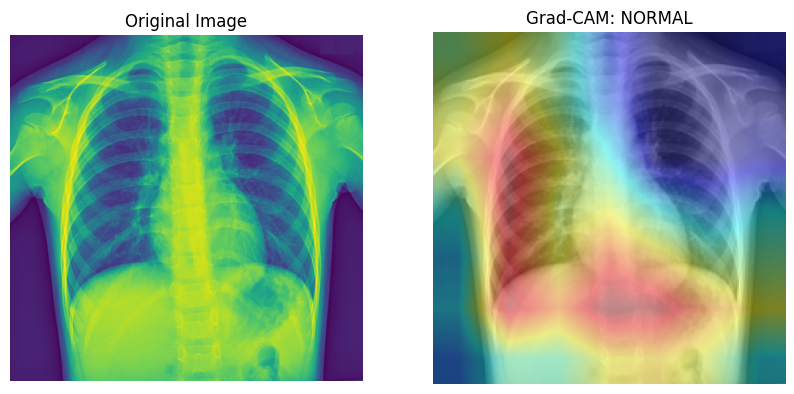

In [ ]:
from PIL import Image, ImageEnhance
import torch
import torchvision.models as models # Import models
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import os
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms # Import transforms
import torchvision.datasets as datasets # Import datasets
import torchvision.models as models # Import models
import numpy as np

# Load the model
model = models.resnet50(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.fc = nn.Linear(model.fc.in_features, 2)
#model.load_state_dict(torch.load("/content/drive/MyDrive/ResNet18model_prototype.pth", map_location=device))
model.load_state_dict(torch.load("/content/drive/MyDrive/ResNet18 Model and Testing Images/ResNet50model_prototype.pth", map_location=device))
model.to(device)
model.eval()

class_names = ["NORMAL", "PNEUMONIA"]

def DCE(pil_image):
    # Convert PIL image to grayscale NumPy array
    gray = np.array(pil_image.convert("L"))

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl1 = clahe.apply(gray)

    # Convert back to PIL RGB for the model
    cl1_rgb = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(cl1_rgb)

def generate_heatmap(model, input_tensor, target_class):
  #Generate Grad-cam heatmap for the given model and image tensor
  #Hook the activations and gradients from the last convolutional layer
  gradients = []
  activations = []

  def backward_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0].detach())

  def forward_hook(module, input, output):
    activations.append(output.detach())

  #Register hooks on the last conv layer
  target_layer = model.layer4[-1].conv2
  forward_handle = target_layer.register_forward_hook(forward_hook)
  backward_handle = target_layer.register_backward_hook(backward_hook)

  #forward pass
  output = model(input_tensor)
  model.zero_grad()
  class_score = output[0, target_class]
  class_score.backward()

  #Get hooked data
  grads = gradients[0]
  acts = activations[0]

  #Global average pooling
  weights = grads.mean(dim=(2,3), keepdim=True)
  cam = (weights * acts).sum(dim=1, keepdim=True)
  cam = F.relu(cam)

  #Normalize the heatmap
  cam = cam.squeeze().cpu().numpy()
  cam = cv2.resize(cam, (224, 224))
  cam = cam - np.min(cam)
  cam = cam / np.max(cam)

  #Clean up hooks
  forward_handle.remove()
  backward_handle.remove()

  return cam

def overlay_heatmap(img, heatmap):
  #Overlay heatmap on the original image
  heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
  img = np.array(img)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  overlay = cv2. addWeighted(heatmap, 0.4, img, 0.6, 0)
  return cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)


def IdentifyImage(img_path):

# Same img transform
  fixed_transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.Grayscale(num_output_channels=3),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
  ])

  # Load and preprocess outside image
  image = Image.open(img_path).convert("L")
  #image = DCE(image)
  input_tensor = fixed_transform(image).unsqueeze(0).to(device)

  # Get prediction
  output = model(input_tensor)
  probabilities = F.softmax(output, dim=1)[0]
  _, predicted = torch.max(probabilities, 0)

  # Print results
  for i, prob in enumerate(probabilities):
      print(f"{class_names[i]}: {prob.item() * 100:.2f}%")

  print(f"Predicted: {class_names[predicted.item()]} with confidence {probabilities[predicted].item() * 100:.2f}%")

  #Generate and display Grad-cam heatmap
  heatmap = generate_heatmap(model, input_tensor, predicted.item())
  overlay = overlay_heatmap(image.resize((224, 224)), heatmap)

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(image)
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.title(f"Grad-CAM: {class_names[predicted.item()]}")
  plt.imshow(overlay)
  plt.axis("off")

  plt.show()

IdentifyImage("/content/drive/MyDrive/ResNet18 Model and Testing Images/Healthy Lung 2.jpg")

In [ ]:
from PIL import Image, ImageEnhance
import torch
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torchvision.transforms as transforms

# -------------------------
# Config / checkpoint paths
# -------------------------
CHECKPOINT_PATH = "/content/drive/MyDrive/ResNet18 Model and Testing Images/DenseNet121model_prototype.pth"
IMAGE_PATH = "/content/drive/MyDrive/ResNet18 Model and Testing Images/Pneumonia Lung.jpg"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------
# Build DenseNet121 model
# -------------------------
model = models.densenet121(pretrained=True)

# Replace classifier for 2 classes (your task)
model.classifier = nn.Linear(model.classifier.in_features, 2)

# Load checkpoint but skip classifier weights if they don't match
state_dict = torch.load(CHECKPOINT_PATH, map_location=DEVICE)

# Remove classifier keys from checkpoint if they exist (so shapes don't have to match)
filtered_state_dict = {k: v for k, v in state_dict.items() if not k.startswith("classifier.")}

# Load with strict=False so missing keys (classifier) are permitted
missing_keys, unexpected_keys = model.load_state_dict(filtered_state_dict, strict=False)
print("Loaded checkpoint — missing keys:", missing_keys)
print("Loaded checkpoint — unexpected keys:", unexpected_keys)

model.to(DEVICE)
model.eval()

class_names = ["NORMAL", "PNEUMONIA"]

# -------------------------
# Preprocessing helpers
# -------------------------
def DCE(pil_image):
    """Apply CLAHE to grayscale and return RGB PIL."""
    gray = np.array(pil_image.convert("L"))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl1 = clahe.apply(gray)
    cl1_rgb = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(cl1_rgb)

fixed_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# -------------------------
# Grad-CAM generation
# -------------------------
def generate_heatmap(model, input_tensor, target_class):
    """
    Generate Grad-CAM heatmap for DenseNet-like models.
    Returns heatmap as (H,W) numpy array normalized 0..1.
    """
    model.eval()

    activations = []
    gradients = []

    # Find last Conv2d layer inside model.features (works for DenseNet)
    target_layer = None
    for name, module in reversed(list(model.features.named_modules())):
        if isinstance(module, nn.Conv2d):
            target_layer = module
            break

    if target_layer is None:
        raise RuntimeError("Could not find a Conv2d layer in model.features")

    # Hook functions
    def forward_hook(module, input, output):
        # store activation (feature map)
        activations.append(output.detach())

    def backward_hook(module, grad_input, grad_output):
        # store gradients w.r.t. the activation
        # grad_output is a tuple; we take [0]
        gradients.append(grad_output[0].detach())

    # Register hooks
    fh = target_layer.register_forward_hook(forward_hook)
    # For modern torch versions, backward_hook works; use full backward hook if available
    try:
        bh = target_layer.register_backward_hook(backward_hook)
    except Exception:
        # fallback to full backward hook (PyTorch versions vary)
        bh = target_layer.register_full_backward_hook(lambda module, grad_input, grad_output: backward_hook(module, grad_input, grad_output))

    # Ensure grads are zeroed
    model.zero_grad()

    # Forward pass (no torch.no_grad because we need gradients)
    output = model(input_tensor.to(DEVICE))

    # If output is logits, take score for target class
    score = output[0, target_class]
    score.backward()

    # Pull activation & grads
    if len(gradients) == 0 or len(activations) == 0:
        # cleanup hooks and raise helpful message
        fh.remove(); bh.remove()
        raise RuntimeError("Hooks did not capture activations or gradients. Make sure the target layer was actually used in forward pass.")

    grads = gradients[0]    # [N, C, H, W]
    acts = activations[0]   # [N, C, H, W]

    # Global-average-pooling on gradients -> weights
    weights = grads.mean(dim=(2, 3), keepdim=True)  # [N, C, 1, 1]

    # Weighted sum of activations
    cam = (weights * acts).sum(dim=1, keepdim=True)  # [N, 1, H, W]
    cam = F.relu(cam)

    cam = cam.squeeze().cpu().numpy()  # [H, W]
    cam = cv2.resize(cam, (224, 224))

    # Normalize with safety against flat maps
    cam_min = np.min(cam)
    cam_max = np.max(cam)
    if cam_max - cam_min <= 1e-8:
        heatmap = np.zeros_like(cam, dtype=np.float32)
    else:
        heatmap = (cam - cam_min) / (cam_max - cam_min)

    # cleanup hooks
    fh.remove()
    bh.remove()

    return heatmap

def overlay_heatmap(pil_img, heatmap, alpha=0.4):
    """Overlay heatmap over PIL image (resized to 224x224). Returns RGB array."""
    img_np = np.array(pil_img.resize((224, 224))).astype(np.uint8)
    # Convert heatmap to color
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    # Blend
    overlay = cv2.addWeighted(heatmap_color, alpha, img_np, 1 - alpha, 0)
    return overlay

# -------------------------
# Inference + display
# -------------------------
def IdentifyImage(img_path):
    # Load and preprocess
    pil = Image.open(img_path).convert("RGB")
    pil_enhanced = ImageEnhance.Contrast(pil).enhance(1.5)
    pil_dce = DCE(pil_enhanced)
    inp = fixed_transform(pil_dce).unsqueeze(0).to(DEVICE)

    # Forward: get prediction
    with torch.no_grad():
        out = model(inp)
        probs = F.softmax(out, dim=1)[0]
        pred = torch.argmax(probs).item()

    print(f"Predicted: {class_names[pred]}  (confidence {probs[pred].item()*100:.2f}%)")

    # Grad-CAM (we need gradients, so not under no_grad)
    heatmap = generate_heatmap(model, inp, pred)
    overlay = overlay_heatmap(pil_dce, heatmap, alpha=0.4)

    # show original (processed) and overlay
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Processed Image (CLAHE)")
    plt.imshow(pil_dce)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title(f"Grad-CAM: {class_names[pred]}")
    plt.imshow(overlay)
    plt.axis("off")

    plt.show()

# Run
IdentifyImage(IMAGE_PATH)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 213MB/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ResNet18 Model and Testing Images/DenseNet121model_prototype.pth'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
# google drive mount for files

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import cv2
import gradio as gr



# Load the model (DenseNet121 as trained in -FKUXS7XpSgG)
# model = models.densenet121(pretrained=True)
model = models.resnet50(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Adjust the classifier for DenseNet121
model.fc = nn.Linear(model.fc.in_features, 2)
# Load the DenseNet121 model checkpoint saved in -FKUXS7XpSgG
model.load_state_dict(torch.load("/content/drive/MyDrive/ResNet18 Model and Testing Images/ResNet50model_prototype.pth", map_location=device))
model.to(device)
model.eval()

class_names = ["NORMAL", "PNEUMONIA"]

# DCE function copied from previous working cells for self-containment
def DCE(pil_image):
    # Convert PIL image to grayscale NumPy array
    gray = np.array(pil_image.convert("L"))

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl1 = clahe.apply(gray)

    # Convert back to PIL RGB for the model
    cl1_rgb = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(cl1_rgb)


# Define the IdentifyImage function for Gradio
def IdentifyImage(pil_image, apply_dce):
  # Image transform
  fixed_transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.Grayscale(num_output_channels=3),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
  ])

  image = pil_image # Gradio provides PIL Image

  if apply_dce:
    image = DCE(image)
    image = image.convert("L") # Ensure L mode after DCE for consistency with transform
  else:
    image = image.convert("L") # Ensure L mode if DCE not applied

  # preprocess image
  input_tensor = fixed_transform(image).unsqueeze(0).to(device)

  with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)[0]
    predicted_class = torch.argmax(probabilities).item()
    confidence = probabilities[predicted_class].item() * 100

  return f"Prediction: {class_names[predicted_class]} ({confidence:.2f}%)"

#Gradio Interface

with gr.Blocks() as demo:
  gr.Markdown("Pneuvision Interface")

  with gr.Row():
    img = gr.Image(type="pil", label="Upload X-Ray")
    apply_dce_checkbox = gr.Checkbox(label="Apply Dynamic Contrast Enhancement (DCE)", value=True)

  output = gr.Textbox(label="Prediction")

  btn = gr.Button("Analyze")
  btn.click(IdentifyImage, inputs=[img, apply_dce_checkbox], outputs=[output])

demo.launch(share=True)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4bcb08af521ffc4127.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
#Gardio Interface

import gradio as gr

with gr.Blocks() as demo:
  gr.Markdown("Pneuvision Interface")

  with gr.Row():
    img = gr.Image(type="pil", label="Upload X-Ray")

  output = gr.Textbox(label="Prediction")

  btn = gr.Button("Analyze")
  btn.click(IdentifyImage, inputs=[img], outputs=[output])

demo.launch(share=True)







NameError: name 'IdentifyImage' is not defined

In [ ]:
pip uninstall torch

In [ ]:
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import cv2
import matplotlib.pyplot as plt
import gradio as gr

# -------------------- MODEL SETUP --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load(
    "/content/drive/MyDrive/ResNet18 Model and Testing Images/ResNet50model_prototype.pth",
    map_location=device
))
model.to(device)
model.eval()

class_names = ["NORMAL", "PNEUMONIA"]

#Uncertainty threshold to trigger flagging
UNCERTAINTY_THRESHOLD = 0.7
# -------------------- DCE FUNCTION --------------------
def DCE(pil_image):
    gray = np.array(pil_image.convert("L"))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl1 = clahe.apply(gray)
    cl1_rgb = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(cl1_rgb)

# -------------------- GRAD-CAM --------------------
def generate_heatmap(model, input_tensor, target_class):
    gradients = []
    activations = []

    def forward_hook(module, input, output):
        activations.append(output.detach())

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0].detach())

    target_layer = model.layer4[-1].conv2
    forward_handle = target_layer.register_forward_hook(forward_hook)
    backward_handle = target_layer.register_backward_hook(backward_hook)

    # Forward + backward
    output = model(input_tensor)
    model.zero_grad()
    class_score = output[0, target_class]
    class_score.backward()

    grads = gradients[0]
    acts = activations[0]
    weights = grads.mean(dim=(2, 3), keepdim=True)
    cam = (weights * acts).sum(dim=1, keepdim=True)
    cam = F.relu(cam)
    cam = cam.squeeze().cpu().numpy()
    cam = cv2.resize(cam, (224, 224))
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)

    forward_handle.remove()
    backward_handle.remove()
    return cam

def overlay_heatmap(pil_image, heatmap):
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    img = np.array(pil_image.convert("RGB"))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    overlay = cv2.addWeighted(heatmap, 0.4, img, 0.6, 0)
    return cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

# -------------------- IDENTIFICATION FUNCTION --------------------
def IdentifyImage(pil_image, dynamicEnhance):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5])
    ])

    if dynamicEnhance:
        pil_image = DCE(pil_image)

    input_tensor = transform(pil_image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        probabilities = F.softmax(output, dim=1)[0]
        predicted = torch.argmax(probabilities).item()
        confidence = probabilities[predicted].item() * 100
    # Determining Uncertainty
    is_uncertain = confidence < UNCERTAINTY_THRESHOLD
    uncertainty_flag = " (Uncertain, needs review)" if is_uncertain else ""
    # Grad-CAM visualization
    heatmap = generate_heatmap(model, input_tensor, predicted)
    overlay = overlay_heatmap(pil_image.resize((224, 224)), heatmap)
    overlay_pil = Image.fromarray(overlay)

    result_text = f"Prediction: {class_names[predicted]} ({confidence:.2f}%) {uncertainty_flag}"
    return result_text, overlay_pil

# -------------------- GRADIO INTERFACE --------------------
with gr.Blocks() as demo:
    gr.Markdown("PneuVision Interface - Chest X-Ray Classifier with Grad-CAM")

    with gr.Row():
        img = gr.Image(type="pil", image_mode="L", label="Upload X-Ray")
        apply_dce_checkbox = gr.Checkbox(label="Apply Dynamic Contrast Enhancement (DCE)", value=True)

    output_text = gr.Textbox(label="Prediction")
    output_heatmap = gr.Image(label="Grad-CAM Heatmap")

    btn = gr.Button("Analyze")
    btn.click(IdentifyImage, inputs=[img, apply_dce_checkbox], outputs=[output_text, output_heatmap])

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b97d744b8b9292aa1f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import cv2
import matplotlib.pyplot as plt
import gradio as gr

# -------------------- MODEL SETUP --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load(
    "/content/drive/MyDrive/ResNet18 Model and Testing Images/ResNet18model.pth",
    map_location=device
))
model.to(device)
model.eval()

class_names = ["NORMAL", "PNEUMONIA"]

#Uncertainty threshold to trigger flagging
UNCERTAINTY_THRESHOLD = 0.7
# -------------------- DCE FUNCTION --------------------
def DCE(pil_image):
    gray = np.array(pil_image.convert("L"))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl1 = clahe.apply(gray)
    cl1_rgb = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
    return Image.fromarray(cl1_rgb)

# -------------------- GRAD-CAM --------------------
def generate_heatmap(model, input_tensor, target_class):
    gradients = []
    activations = []

    def forward_hook(module, input, output):
        activations.append(output.detach())

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0].detach())

    target_layer = model.layer4[-1].conv2
    forward_handle = target_layer.register_forward_hook(forward_hook)
    backward_handle = target_layer.register_backward_hook(backward_hook)

    # Forward + backward
    output = model(input_tensor)
    model.zero_grad()
    class_score = output[0, target_class]
    class_score.backward()

    grads = gradients[0]
    acts = activations[0]
    weights = grads.mean(dim=(2, 3), keepdim=True)
    cam = (weights * acts).sum(dim=1, keepdim=True)
    cam = F.relu(cam)
    cam = cam.squeeze().cpu().numpy()
    cam = cv2.resize(cam, (224, 224))
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)

    forward_handle.remove()
    backward_handle.remove()
    return cam

def overlay_heatmap(pil_image, heatmap):
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    img = np.array(pil_image.convert("RGB"))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    overlay = cv2.addWeighted(heatmap, 0.4, img, 0.6, 0)
    return cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

# -------------------- IDENTIFICATION FUNCTION --------------------
def IdentifyImage(pil_image, dynamicEnhance):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5])
    ])

    if dynamicEnhance:
        pil_image = DCE(pil_image)

    input_tensor = transform(pil_image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        probabilities = F.softmax(output, dim=1)[0]
        predicted = torch.argmax(probabilities).item()
        confidence = probabilities[predicted].item() * 100
    # Determining Uncertainty
    is_uncertain = confidence < UNCERTAINTY_THRESHOLD
    uncertainty_flag = " (Uncertain, needs review)" if is_uncertain else ""
    # Grad-CAM visualization
    heatmap = generate_heatmap(model, input_tensor, predicted)
    overlay = overlay_heatmap(pil_image.resize((224, 224)), heatmap)
    overlay_pil = Image.fromarray(overlay)

    result_text = f"Prediction: {class_names[predicted]} ({confidence:.2f}%) {uncertainty_flag}"
    return result_text, overlay_pil

# -------------------- GRADIO INTERFACE --------------------
with gr.Blocks() as demo:
    gr.Markdown("PneuVision Interface - Chest X-Ray Classifier with Grad-CAM")

    with gr.Row():
        img = gr.Image(type="pil", image_mode="L", label="Upload X-Ray")
        apply_dce_checkbox = gr.Checkbox(label="Apply Dynamic Contrast Enhancement (DCE)", value=True)

    output_text = gr.Textbox(label="Prediction")
    output_heatmap = gr.Image(label="Grad-CAM Heatmap")

    btn = gr.Button("Analyze")
    btn.click(IdentifyImage, inputs=[img, apply_dce_checkbox], outputs=[output_text, output_heatmap])

demo.launch(share=True)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 452MB/s]


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7f1e95c006c9195138.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
